In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Calsification problem 
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#check if any data is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


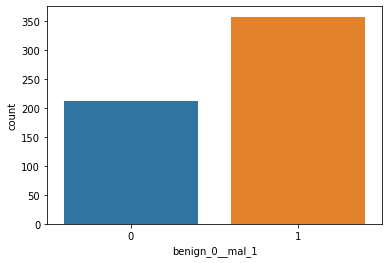

In [7]:
sns.countplot(x='benign_0__mal_1', data = df)
# allmost  same count df.

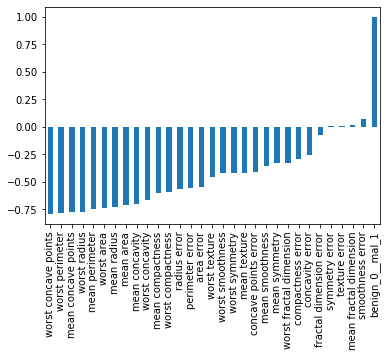

In [10]:
#Correlation 
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

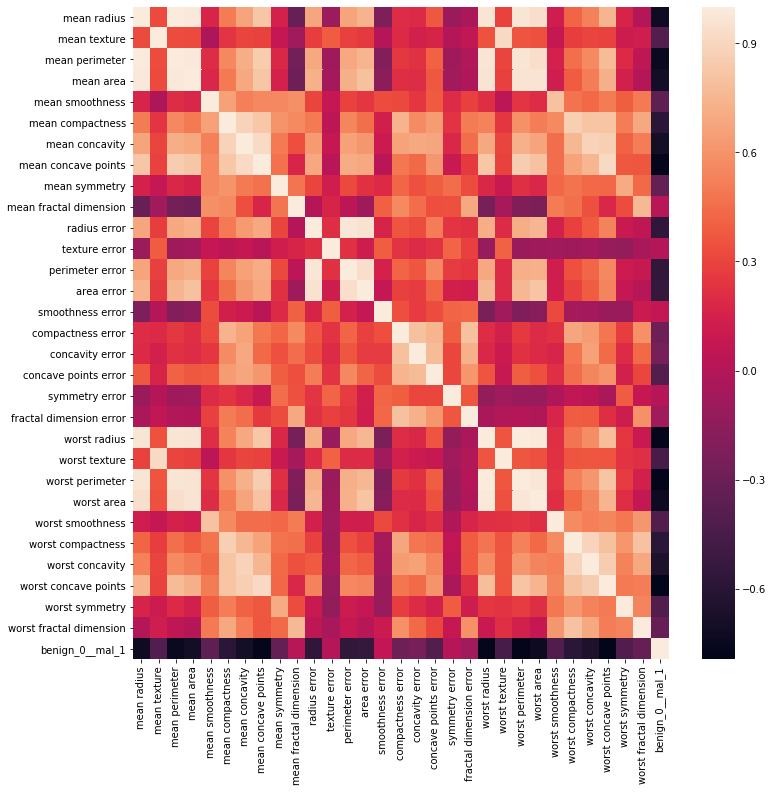

In [12]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr())

In [32]:
X= df.drop('benign_0__mal_1', axis =1).values

In [33]:
y = df['benign_0__mal_1'].values

In [34]:
from sklearn.model_selection import train_test_split
 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scalar = MinMaxScaler()

In [38]:
X_train = scalar.fit_transform(X_train)

In [39]:
X_test = scalar.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense, Dropout 

In [42]:
X_train.shape

(426, 30)

In [54]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
#Binary clasification use sigmoid
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam')


In [55]:
#Large epoch
model.fit(x= X_train, y= y_train, epochs= 600, validation_data= (X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6804 - val_loss: 0.6647
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6452 - val_loss: 0.6274
Epoch 3/600
426/426 [==============================] - 0s 112us/sample - loss: 0.6004 - val_loss: 0.5806
Epoch 4/600
426/426 [==============================] - 0s 109us/sample - loss: 0.5505 - val_loss: 0.5275
Epoch 5/600
426/426 [==============================] - 0s 117us/sample - loss: 0.4936 - val_loss: 0.4663
Epoch 6/600
426/426 [==============================] - 0s 137us/sample - loss: 0.4358 - val_loss: 0.4111
Epoch 7/600
426/426 [==============================] - 0s 122us/sample - loss: 0.3864 - val_loss: 0.3619
Epoch 8/600
426/426 [==============================] - 0s 131us/sample - loss: 0.3441 - val_loss: 0.3208
Epoch 9/600
426/426 [==============================] - 0s 105us/sample - loss: 0.3072 - val_loss: 0.2841
Epoch 10/60

426/426 [==============================] - 0s 130us/sample - loss: 0.0593 - val_loss: 0.1198
Epoch 79/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0516 - val_loss: 0.1144
Epoch 80/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0556 - val_loss: 0.1198
Epoch 81/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0508 - val_loss: 0.1130
Epoch 82/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0497 - val_loss: 0.1164
Epoch 83/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0495 - val_loss: 0.1141
Epoch 84/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0515 - val_loss: 0.1148
Epoch 85/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0493 - val_loss: 0.1139
Epoch 86/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0489 - val_loss: 0.1104
Epoch 87/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 121us/sample - loss: 0.0341 - val_loss: 0.1247
Epoch 156/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0332 - val_loss: 0.1239
Epoch 157/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0338 - val_loss: 0.1216
Epoch 158/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0349 - val_loss: 0.1232
Epoch 159/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0354 - val_loss: 0.1270
Epoch 160/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0382 - val_loss: 0.1258
Epoch 161/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0329 - val_loss: 0.1237
Epoch 162/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0323 - val_loss: 0.1190
Epoch 163/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0325 - val_loss: 0.1237
Epoch 164/600
426/426 [==============================] 

Epoch 232/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0227 - val_loss: 0.1234
Epoch 233/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0227 - val_loss: 0.1249
Epoch 234/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0227 - val_loss: 0.1396
Epoch 235/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0246 - val_loss: 0.1237
Epoch 236/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0221 - val_loss: 0.1234
Epoch 237/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0225 - val_loss: 0.1276
Epoch 238/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0254 - val_loss: 0.1234
Epoch 239/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0277 - val_loss: 0.1345
Epoch 240/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0235 - val_loss: 0.1220
Epoch 241/600
426/426 [===============

426/426 [==============================] - 0s 114us/sample - loss: 0.0179 - val_loss: 0.1212
Epoch 309/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0148 - val_loss: 0.1259
Epoch 310/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0154 - val_loss: 0.1270
Epoch 311/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0149 - val_loss: 0.1301
Epoch 312/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0140 - val_loss: 0.1271
Epoch 313/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0139 - val_loss: 0.1297
Epoch 314/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0144 - val_loss: 0.1399
Epoch 315/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0150 - val_loss: 0.1329
Epoch 316/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0151 - val_loss: 0.1465
Epoch 317/600
426/426 [============================

Epoch 385/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0120 - val_loss: 0.1817
Epoch 386/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0090 - val_loss: 0.1779
Epoch 387/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0116 - val_loss: 0.1938
Epoch 388/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0123 - val_loss: 0.1621
Epoch 389/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0086 - val_loss: 0.1749
Epoch 390/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0092 - val_loss: 0.1747
Epoch 391/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0106 - val_loss: 0.1749
Epoch 392/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0089 - val_loss: 0.1763
Epoch 393/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0082 - val_loss: 0.1820
Epoch 394/600
426/426 [=====================

Epoch 462/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0062 - val_loss: 0.2341
Epoch 463/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0056 - val_loss: 0.2387
Epoch 464/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0056 - val_loss: 0.2362
Epoch 465/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0065 - val_loss: 0.2429
Epoch 466/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0067 - val_loss: 0.2336
Epoch 467/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0056 - val_loss: 0.2418
Epoch 468/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0050 - val_loss: 0.2475
Epoch 469/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0058 - val_loss: 0.2531
Epoch 470/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0069 - val_loss: 0.2509
Epoch 471/600
426/426 [=================

Epoch 539/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0035 - val_loss: 0.3079
Epoch 540/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0031 - val_loss: 0.3025
Epoch 541/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0030 - val_loss: 0.3040
Epoch 542/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0033 - val_loss: 0.3018
Epoch 543/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0029 - val_loss: 0.3097
Epoch 544/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0030 - val_loss: 0.3101
Epoch 545/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0029 - val_loss: 0.3159
Epoch 546/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0044 - val_loss: 0.3250
Epoch 547/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0048 - val_loss: 0.2934
Epoch 548/600
426/426 [=================

In [57]:
losses = pd.DataFrame(model.history.history)

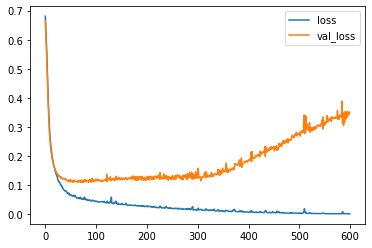

In [58]:
losses.plot()

In [59]:

# Early stop 


model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
#Binary clasification use sigmoid
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam')



In [60]:
from  tensorflow.keras.callbacks import EarlyStopping

In [63]:
erly_Stop = EarlyStopping(monitor= 'val_loss', mode = 'min', verbose= 1, patience= 25)

 model.fit(x= X_train, y= y_train, epochs= 600, validation_data= (X_test, y_test),callbacks = [erly_Stop])

In [64]:
model.fit(x= X_train, y= y_train, epochs= 600, validation_data= (X_test, y_test),callbacks = [erly_Stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6622 - val_loss: 0.6363
Epoch 2/600
426/426 [==============================] - 0s 109us/sample - loss: 0.6205 - val_loss: 0.5973
Epoch 3/600
426/426 [==============================] - 0s 104us/sample - loss: 0.5744 - val_loss: 0.5481
Epoch 4/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5212 - val_loss: 0.4939
Epoch 5/600
426/426 [==============================] - 0s 102us/sample - loss: 0.4715 - val_loss: 0.4388
Epoch 6/600
426/426 [==============================] - 0s 98us/sample - loss: 0.4259 - val_loss: 0.3966
Epoch 7/600
426/426 [==============================] - 0s 108us/sample - loss: 0.3801 - val_loss: 0.3497
Epoch 8/600
426/426 [==============================] - 0s 101us/sample - loss: 0.3427 - val_loss: 0.3136
Epoch 9/600
426/426 [==============================] - 0s 99us/sample - loss: 0.3113 - val_loss: 0.2811
Epoch 10/600


In [65]:
losses = pd.DataFrame(model.history.history)

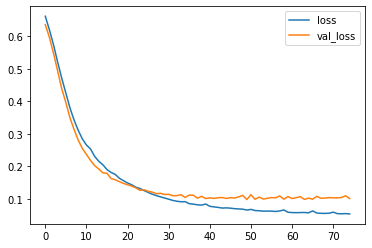

In [66]:
losses.plot()

In [67]:
from tensorflow.keras.layers import Dropout

In [68]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))
#Binary clasification use sigmoid
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam')

In [69]:
model.fit(x= X_train, y= y_train, epochs= 600, validation_data= (X_test, y_test),callbacks = [erly_Stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7189 - val_loss: 0.6798
Epoch 2/600
426/426 [==============================] - 0s 135us/sample - loss: 0.7073 - val_loss: 0.6626
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6731 - val_loss: 0.6445
Epoch 4/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6530 - val_loss: 0.6263
Epoch 5/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6348 - val_loss: 0.6078
Epoch 6/600
426/426 [==============================] - 0s 123us/sample - loss: 0.6356 - val_loss: 0.5912
Epoch 7/600
426/426 [==============================] - 0s 121us/sample - loss: 0.6264 - val_loss: 0.5708
Epoch 8/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5666 - val_loss: 0.5421
Epoch 9/600
426/426 [==============================] - 0s 114us/sample - loss: 0.5807 - val_loss: 0.5141
Epoch 10/60

426/426 [==============================] - 0s 109us/sample - loss: 0.1288 - val_loss: 0.0872
Epoch 78/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1181 - val_loss: 0.0860
Epoch 79/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1298 - val_loss: 0.0812
Epoch 80/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0996 - val_loss: 0.0875
Epoch 81/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1106 - val_loss: 0.0970
Epoch 82/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0988 - val_loss: 0.0820
Epoch 83/600
426/426 [==============================] - 0s 106us/sample - loss: 0.1006 - val_loss: 0.0895
Epoch 84/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1219 - val_loss: 0.0800
Epoch 85/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1108 - val_loss: 0.0848
Epoch 86/600
426/426 [==============================] - 0s 

Epoch 154/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0866 - val_loss: 0.0816
Epoch 155/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0597 - val_loss: 0.0825
Epoch 156/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0790 - val_loss: 0.0753
Epoch 157/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0844 - val_loss: 0.0804
Epoch 00157: early stopping


In [70]:
losses = pd.DataFrame(model.history.history)

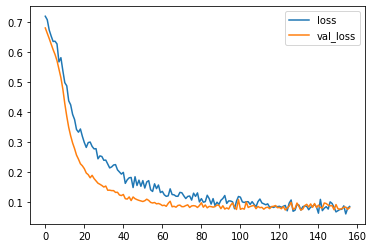

In [71]:
losses.plot()

In [72]:
predication = model.predict_classes(X_test)

In [73]:
from sklearn.metrics  import classification_report, confusion_matrix

In [74]:
print (classification_report(y_test, predication))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [75]:
print (confusion_matrix(y_test, predication))

[[54  1]
 [ 3 85]]
